# **Diabetes disease prediction**

In [ ]:
# importing the required dependencies
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import svm
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import missingno as msno

**Data Analysis :**
* Dataset : PIMA Diabetes Dataset*

In [ ]:
#Loading the data from csv file to Dataframe using Pandas
diab_diab_df = pd.read_csv('/content/diabetes.csv') 

In [ ]:
# Displaying the Data using dataframe ; We are reaidng the first 10 records of the dataset.
diab_df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [ ]:
diab_df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


**Description of the Dataset **

**Pregnancies:** Indicates the number of times the person has been pregnant.

**Glucose:** Refers to the concentration of plasma glucose in the blood.

**BloodPressure**: Represents the diastolic blood pressure, measured in mm Hg.

**SkinThickness:** Denotes the thickness of triceps skin fold, measured in mm.

**Insulin:** Indicates the level of serum insulin after a 2-hour test, measured in mu U/ml.

**BMI:** Stands for Body Mass Index, a measure of body fat based on height and weight.

**DiabetesPedigreeFunction:**  function that estimates the probability of the person developing diabetes based on family history.

**Age:** Represents the person's age in years.

**Outcome:** Indicates whether the person is diabetic or not. A value of 0 means the person is not diabetic, while a value of 1 indicates the person has diabetes.

In [ ]:
#To find the number of rows and colums in our dataset 
diab_df.shape

(768, 9)

We have 768 rows and 9 columns in total

In [ ]:
# To check the missing values:
#diab_df.isnull.sum()
# To check the missing values:
diab_df.isnull().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
# Description of the Dataset :

diab_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


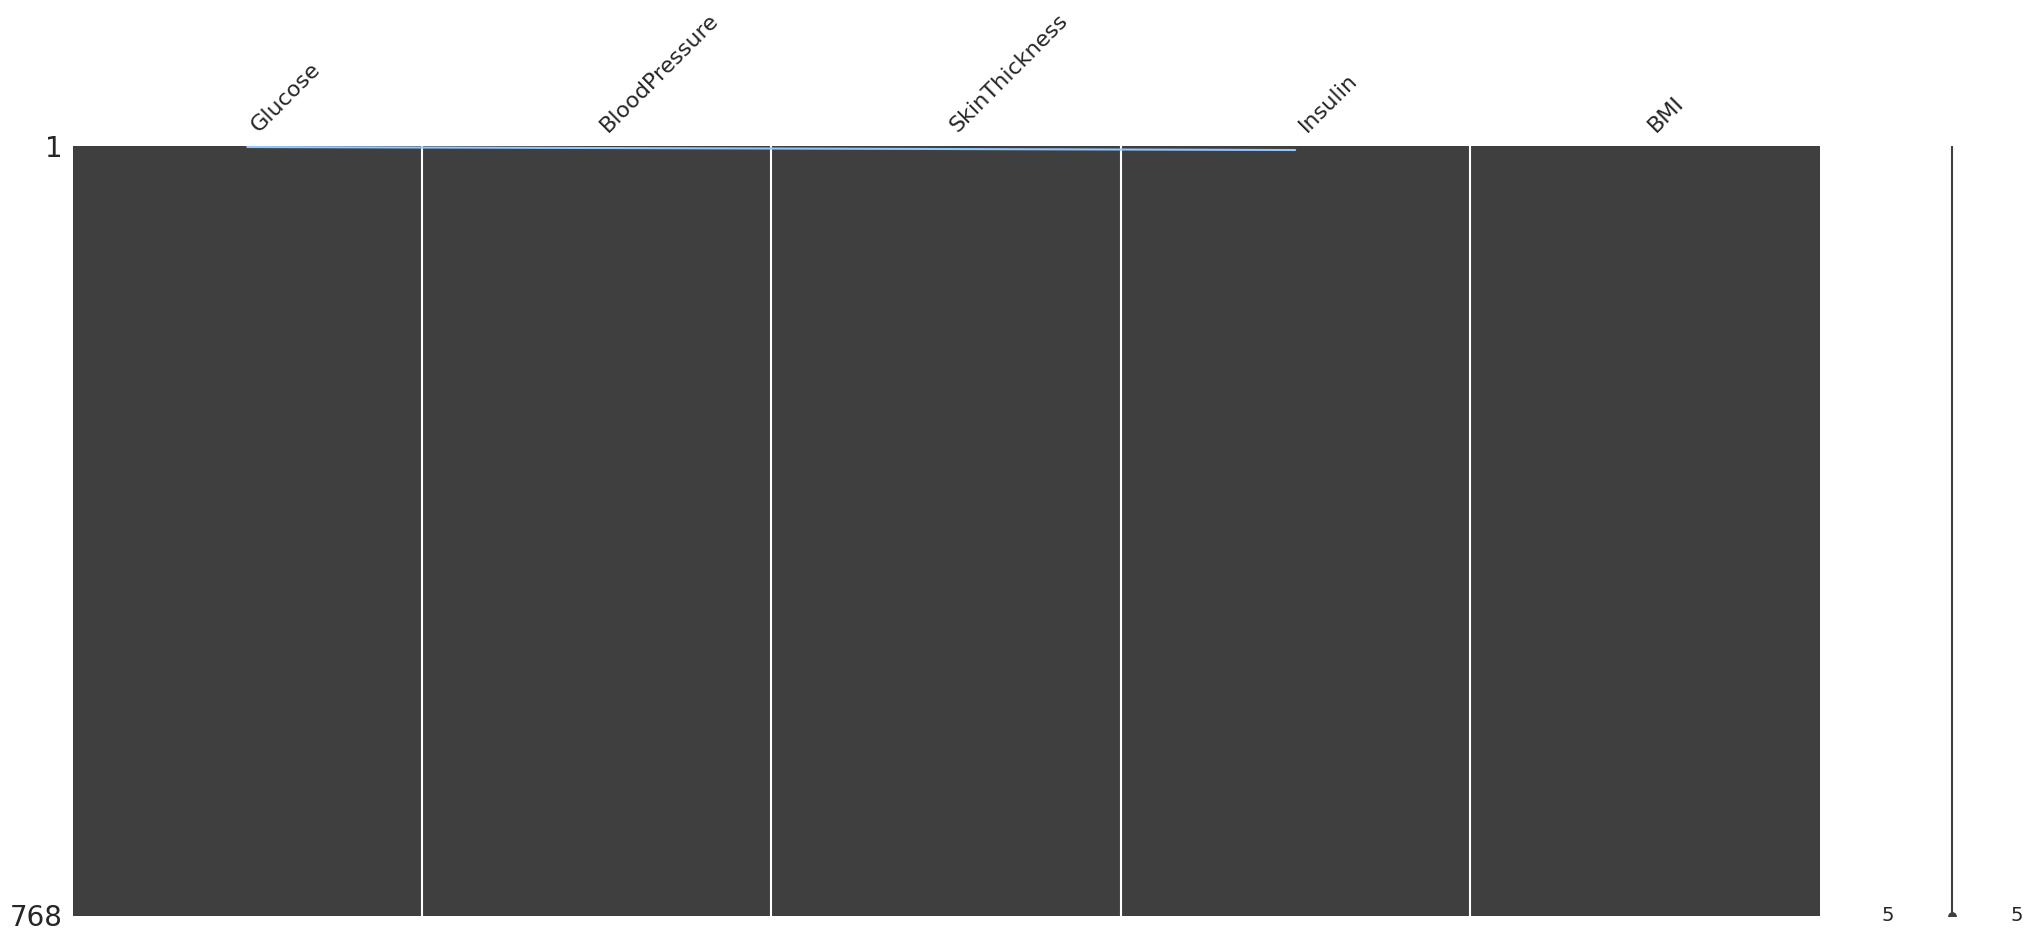

In [ ]:
msno.matrix(diab_df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']])
plt.plot([1, 2, 3, 4])
plt.show()

We could see that there are no missing values in the Dataset.

**Exploratory Data Analysis:**

In [ ]:
# Inorder to understand the outcomes
import matplotlib as plot 
import seaborn as sns
from itertools import cycle


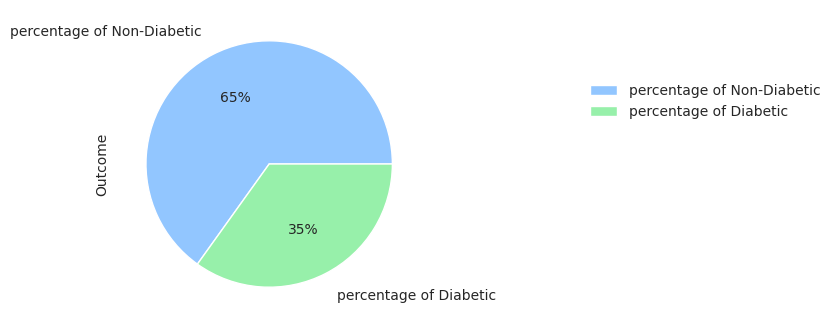

In [ ]:
import matplotlib.style as style
fig, ax = plt.subplots()
style.available
style.use('seaborn-pastel')
labels = ["percentage of Non-Diabetic", "percentage of Diabetic"]
diab_df['Outcome'].value_counts().plot(kind='pie', labels=labels, autopct='%1.0f%%', labeldistance=1.2, figsize=(4,4))
ax.legend(frameon=False, bbox_to_anchor=(1.5,0.8))
plt.show()

The pie chart indicates that a substantial portion of patients, about 35%, are classified as diabetic, while the majority of patients are considered healthy. It may be useful to conduct additional analyses to explore any factors that could be linked to a greater likelihood of diabetes, or to identify variations in other variables, like age, gender, or lifestyle factors, between healthy and diabetic patients in the dataset.

The distribution of the target variable does not exhibit any skewness or imbalance, which suggests that we can proceed with the same data without resorting to techniques like SMOTE, undersampling, or oversampling. However, we must ensure that the class distribution remains consistent when we split the data into training and testing sets.


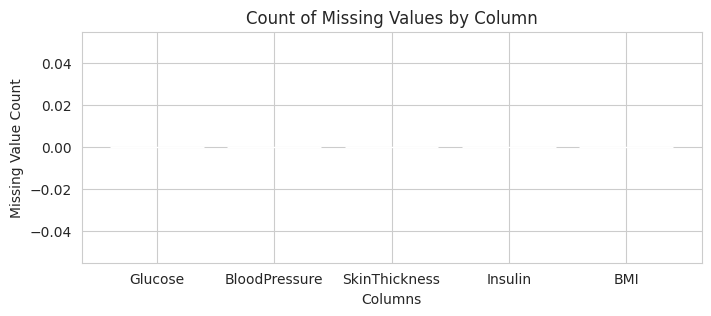

In [ ]:
columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
missing_counts = diab_df[columns].isnull().sum()
colors = np.array(['red', 'green', 'blue', 'orange', 'purple'])

# Creating bar plot
fig, ax = plt.subplots(figsize=(8,3))
ax.bar(columns, missing_counts, color=colors)

# Set chart title and axis labels
ax.set_title('Count of Missing Values by Column')
ax.set_xlabel('Columns')
ax.set_ylabel('Missing Value Count')

# Display the plot
plt.show()


Based on the provided information, it seems that the dataset being referred to contains two columns with a significant amount of missing values: Insulin and SkinThickness. Insulin appears to have close to 50%  of its values as zero or null  from the total data, while SkinThickness has close to 30% missing values.

In this section, our focus will be on conducting a preliminary Exploratory Data Analysis to gain a better understanding of the data. We will examine the distributions, correlations, and other relevant characteristics of the various columns, while also taking steps to address any missing values.

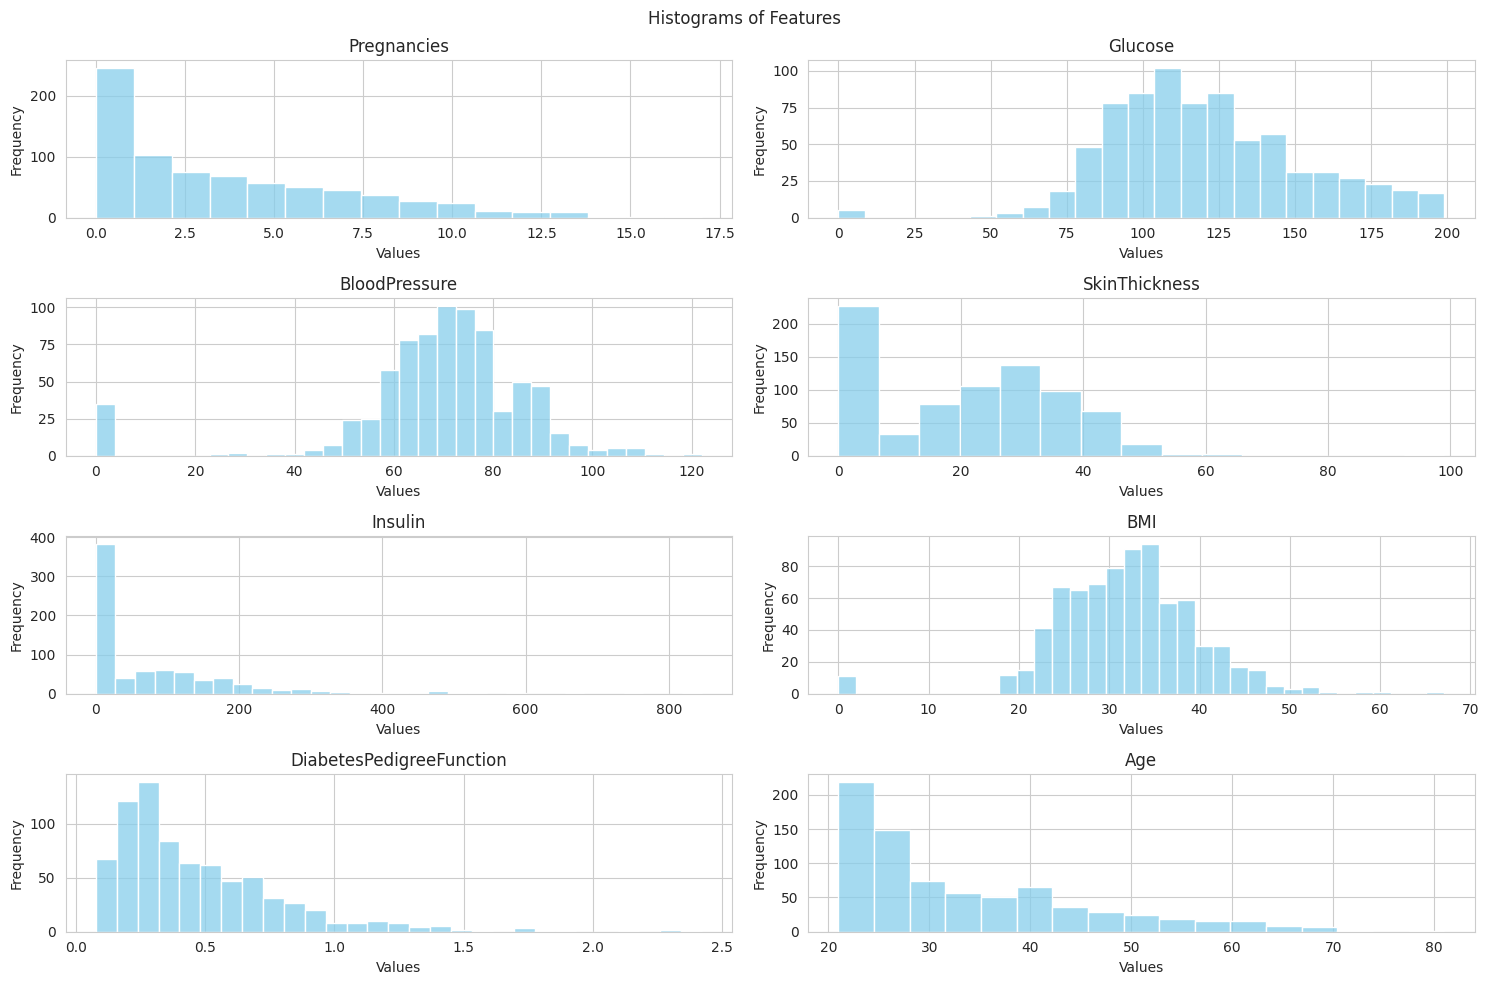

In [ ]:
fig, axes = plt.subplots(4, 2, figsize=(15, 10))
axes = axes.flatten()
ax_idx = 0
columns = diab_df.drop('Outcome', axis=1).columns
for col in columns:
    sns.histplot(data=diab_df, x=col, ax=axes[ax_idx], color='skyblue')
    axes[ax_idx].set_title(col)
    axes[ax_idx].set_xlabel('Values')
    axes[ax_idx].set_ylabel('Frequency')
    ax_idx += 1

plt.suptitle('Histograms of Features')
plt.tight_layout()
plt.show()


We should examine the skewness of every column.

Skewness relates to the degree of lack of symmetry in a particular characteristic or, put differently, the level of deviation from a normal distribution. The highest point on the histogram indicates the mode.

In [ ]:
from scipy.stats import skew
for col in diab_df.drop('Outcome', axis=1):
    skewness = skew(diab_df[col])
    print("Skewness for the column '{}' is {:.3f}".format(col, skewness))


Skewness for the column 'Pregnancies' is 0.900
Skewness for the column 'Glucose' is 0.173
Skewness for the column 'BloodPressure' is -1.840
Skewness for the column 'SkinThickness' is 0.109
Skewness for the column 'Insulin' is 2.268
Skewness for the column 'BMI' is -0.428
Skewness for the column 'DiabetesPedigreeFunction' is 1.916
Skewness for the column 'Age' is 1.127


In [ ]:
from scipy.stats import skew
for col in diab_df.drop('Outcome', axis = 1).columns:
    print("Skewness for the column {} is {}".format(col, diab_df[col].skew()))

Skewness for the column Pregnancies is 0.9016739791518588
Skewness for the column Glucose is 0.17375350179188992
Skewness for the column BloodPressure is -1.8436079833551302
Skewness for the column SkinThickness is 0.10937249648187608
Skewness for the column Insulin is 2.272250858431574
Skewness for the column BMI is -0.42898158845356543
Skewness for the column DiabetesPedigreeFunction is 1.919911066307204
Skewness for the column Age is 1.1295967011444805


Based on the observations provided, we can see that the "Pregnancies," "DiabetesPedigreeFunction," and "Age" columns have positive skewness, while the "Glucose," "BloodPressure," "SkinThickness," "Insulin," and "BMI" columns have missing values for skewness. This suggests that the data in those columns may not be normally distributed or there may be missing values. It is recommended to use the mean.


In [ ]:
diab_df['Insulin'] =diab_df['Insulin'].fillna(diab_df['Insulin'].median()) # Filling null values with the median.

for col in ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI']:
    diab_df[col] = diab_df[col].fillna(diab_df[col].mean())

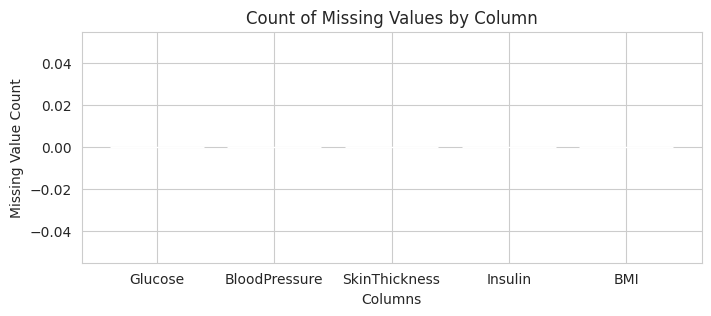

In [ ]:
columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
missing_counts = diab_df[columns].isnull().sum()
colors = np.array(['red', 'green', 'blue', 'orange', 'purple'])

# Creating bar plot
fig, ax = plt.subplots(figsize=(8,3))
ax.bar(columns, missing_counts, color=colors)

# Set chart title and axis labels
ax.set_title('Count of Missing Values by Column')
ax.set_xlabel('Columns')
ax.set_ylabel('Missing Value Count')

# Display the plot
plt.show()


In [ ]:
diab_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Missing values and null values are all handled now.

In [ ]:
# This is a function that calculates the average values for a specific column called 'var', based on whether an individual has diabetes or not.
def mean_trgt(var):
    return pd.DataFrame(diab_df.groupby('Outcome').mean()[var])

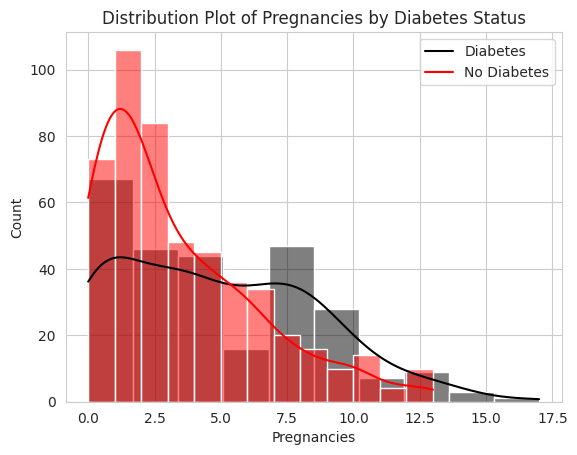

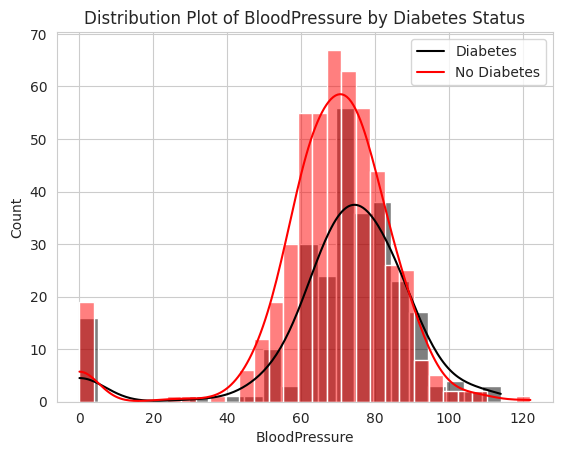

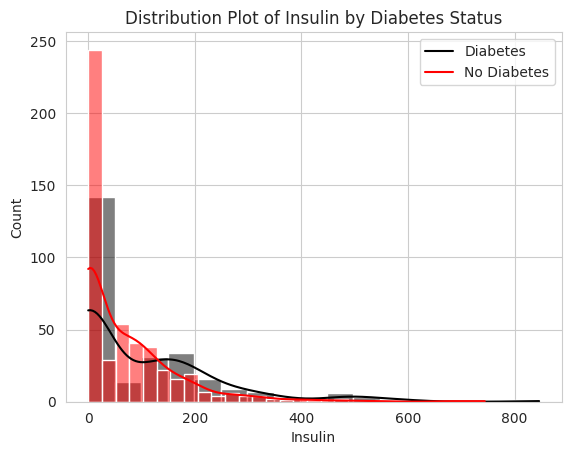

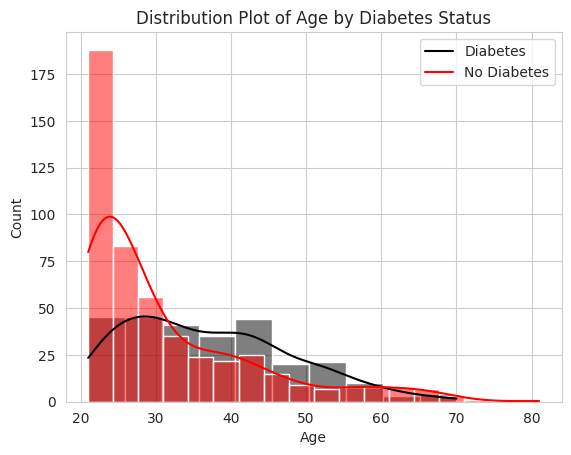

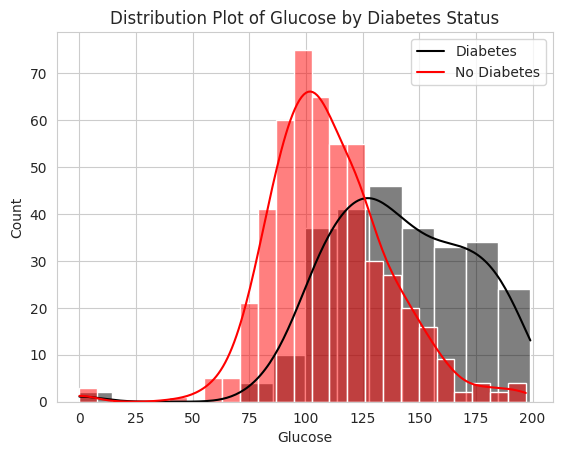

In [ ]:
import seaborn as sns

columns = ['Pregnancies', 'BloodPressure', 'Insulin', 'Age', 'Glucose']

for col in columns:
    plt.figure()
    ax = sns.histplot(diab_df[col][diab_df.Outcome == 1], color ="black", kde=True)
    sns.histplot(diab_df[col][diab_df.Outcome == 0], color ="red", kde=True)
    plt.legend(['Diabetes', 'No Diabetes'])
    ax.set(xlabel=col, ylabel='Count', title='Distribution Plot of '+col+' by Diabetes Status')


In [ ]:
# Calculate the mean targets for all columns
mean_targets = diab_df.groupby('Outcome').mean().T
mean_targets.columns = ['Non-diabetic', 'Diabetic']

# Print the mean targets in a tabular form
print(mean_targets)


                          Non-diabetic    Diabetic
Pregnancies                   3.298000    4.865672
Glucose                     109.980000  141.257463
BloodPressure                68.184000   70.824627
SkinThickness                19.664000   22.164179
Insulin                      68.792000  100.335821
BMI                          30.304200   35.142537
DiabetesPedigreeFunction      0.429734    0.550500
Age                          31.190000   37.067164


From the given table, we can observe that for all the columns except for "DiabetesPedigreeFunction" and "Age", the mean values for the "Diabetic" group are higher than those of the "Non-diabetic" group. This indicates that there may be a positive correlation between these features and the presence of diabetes.

The "DiabetesPedigreeFunction" feature has a slightly higher mean value for the "Diabetic" group, suggesting that there may be a weak positive correlation between this feature and the presence of diabetes.

The "Age" feature has a significantly higher mean value for the "Diabetic" group, indicating that age may be a strong risk factor for diabetes.

**Analysis from box plots :**

Let's think like a common man, and analyze the data.



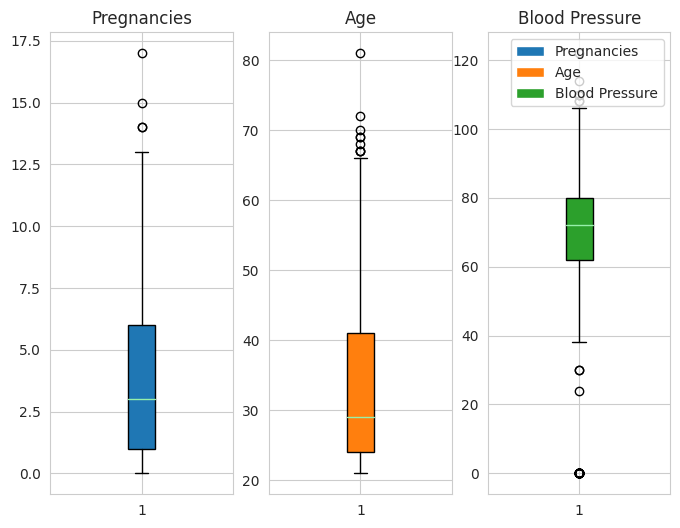

In [ ]:
# Load the dataset into a pandas DataFrame
diab_df = pd.read_csv("diabetes.csv")
# Define colors for the box plots
colors = ["#1f77b4", "#ff7f0e", "#2ca02c"]

# Create a figure with three subplots, one for each column
fig, axs = plt.subplots(ncols=3, figsize=(8,6))

# Create a box plot for the "pregnancies" column
axs[0].boxplot(diab_df["Pregnancies"], patch_artist=True, boxprops=dict(facecolor=colors[0]))
axs[0].set_title("Pregnancies")

# Create a box plot for the "Age" column
axs[1].boxplot(diab_df["Age"], patch_artist=True, boxprops=dict(facecolor=colors[1]))
axs[1].set_title("Age")

# Create a box plot for the "Bloodpressure" column
axs[2].boxplot(diab_df["BloodPressure"], patch_artist=True, boxprops=dict(facecolor=colors[2]))
axs[2].set_title("Blood Pressure")

# Add a legend
legend_labels = ["Pregnancies", "Age", "Blood Pressure"]
patch_list = [plt.Rectangle((0,0),1,1,facecolor=colors[i]) for i in range(len(legend_labels))]
plt.legend(patch_list, legend_labels)

# Show the plot
plt.show()



First, we would know what is the effect of Age on the Outcome because we have heard that as the age increases, the chances of diabetes also commonly increases.
The median of the age of diabetic people is greater than that of non-diabetic people.
The median of the BloodPressure of diabetic people lies close to the 75th Percentile of non-diabetic people.


**Correlation Matrix:**

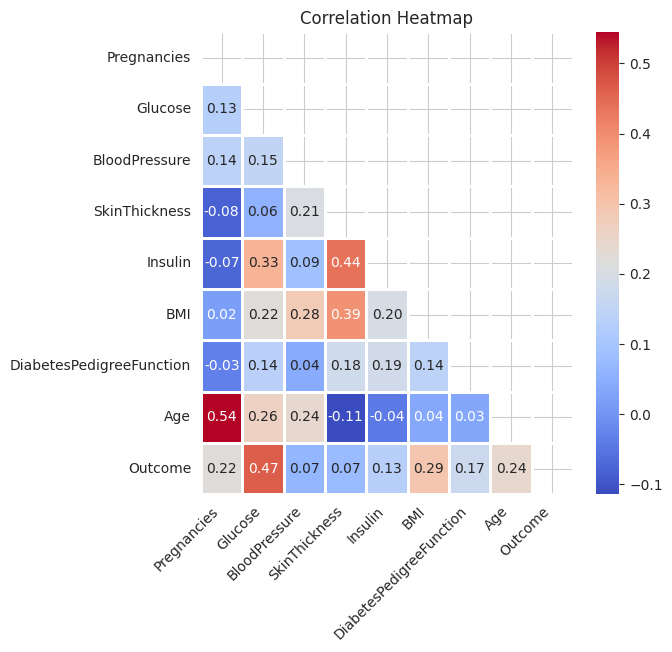

In [ ]:
plt.figure(figsize=(6, 6), dpi=100)
# Create a mask for the upper triangle of the correlation matrix
mask = np.triu(np.ones_like(diab_df.corr(), dtype=bool))
# Create the heatmap using seaborn
sns.heatmap(diab_df.corr(), mask=mask, fmt=".2f", annot=True, linewidths=1, cmap='coolwarm')
# Rotate the x-axis and y-axis tick labels for better visibility
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.title("Correlation Heatmap")
plt.show()


The heatmap depicted above suggests that there is low correlation between all of the features, which removes any concerns regarding multicollinearity. Multicollinearity occurs when one predictor variable in a multiple regression model can be accurately predicted in a linear fashion based on the other predictors. Logistic Regression models necessitate that the features are not collinear with each other, as the presence of multicollinearity can cause the model to perform poorly.

**Pair Plots:** The pairplot provides a useful visualization of the relationships between the features and the target variable, which can help guide feature selection and modeling decisions.

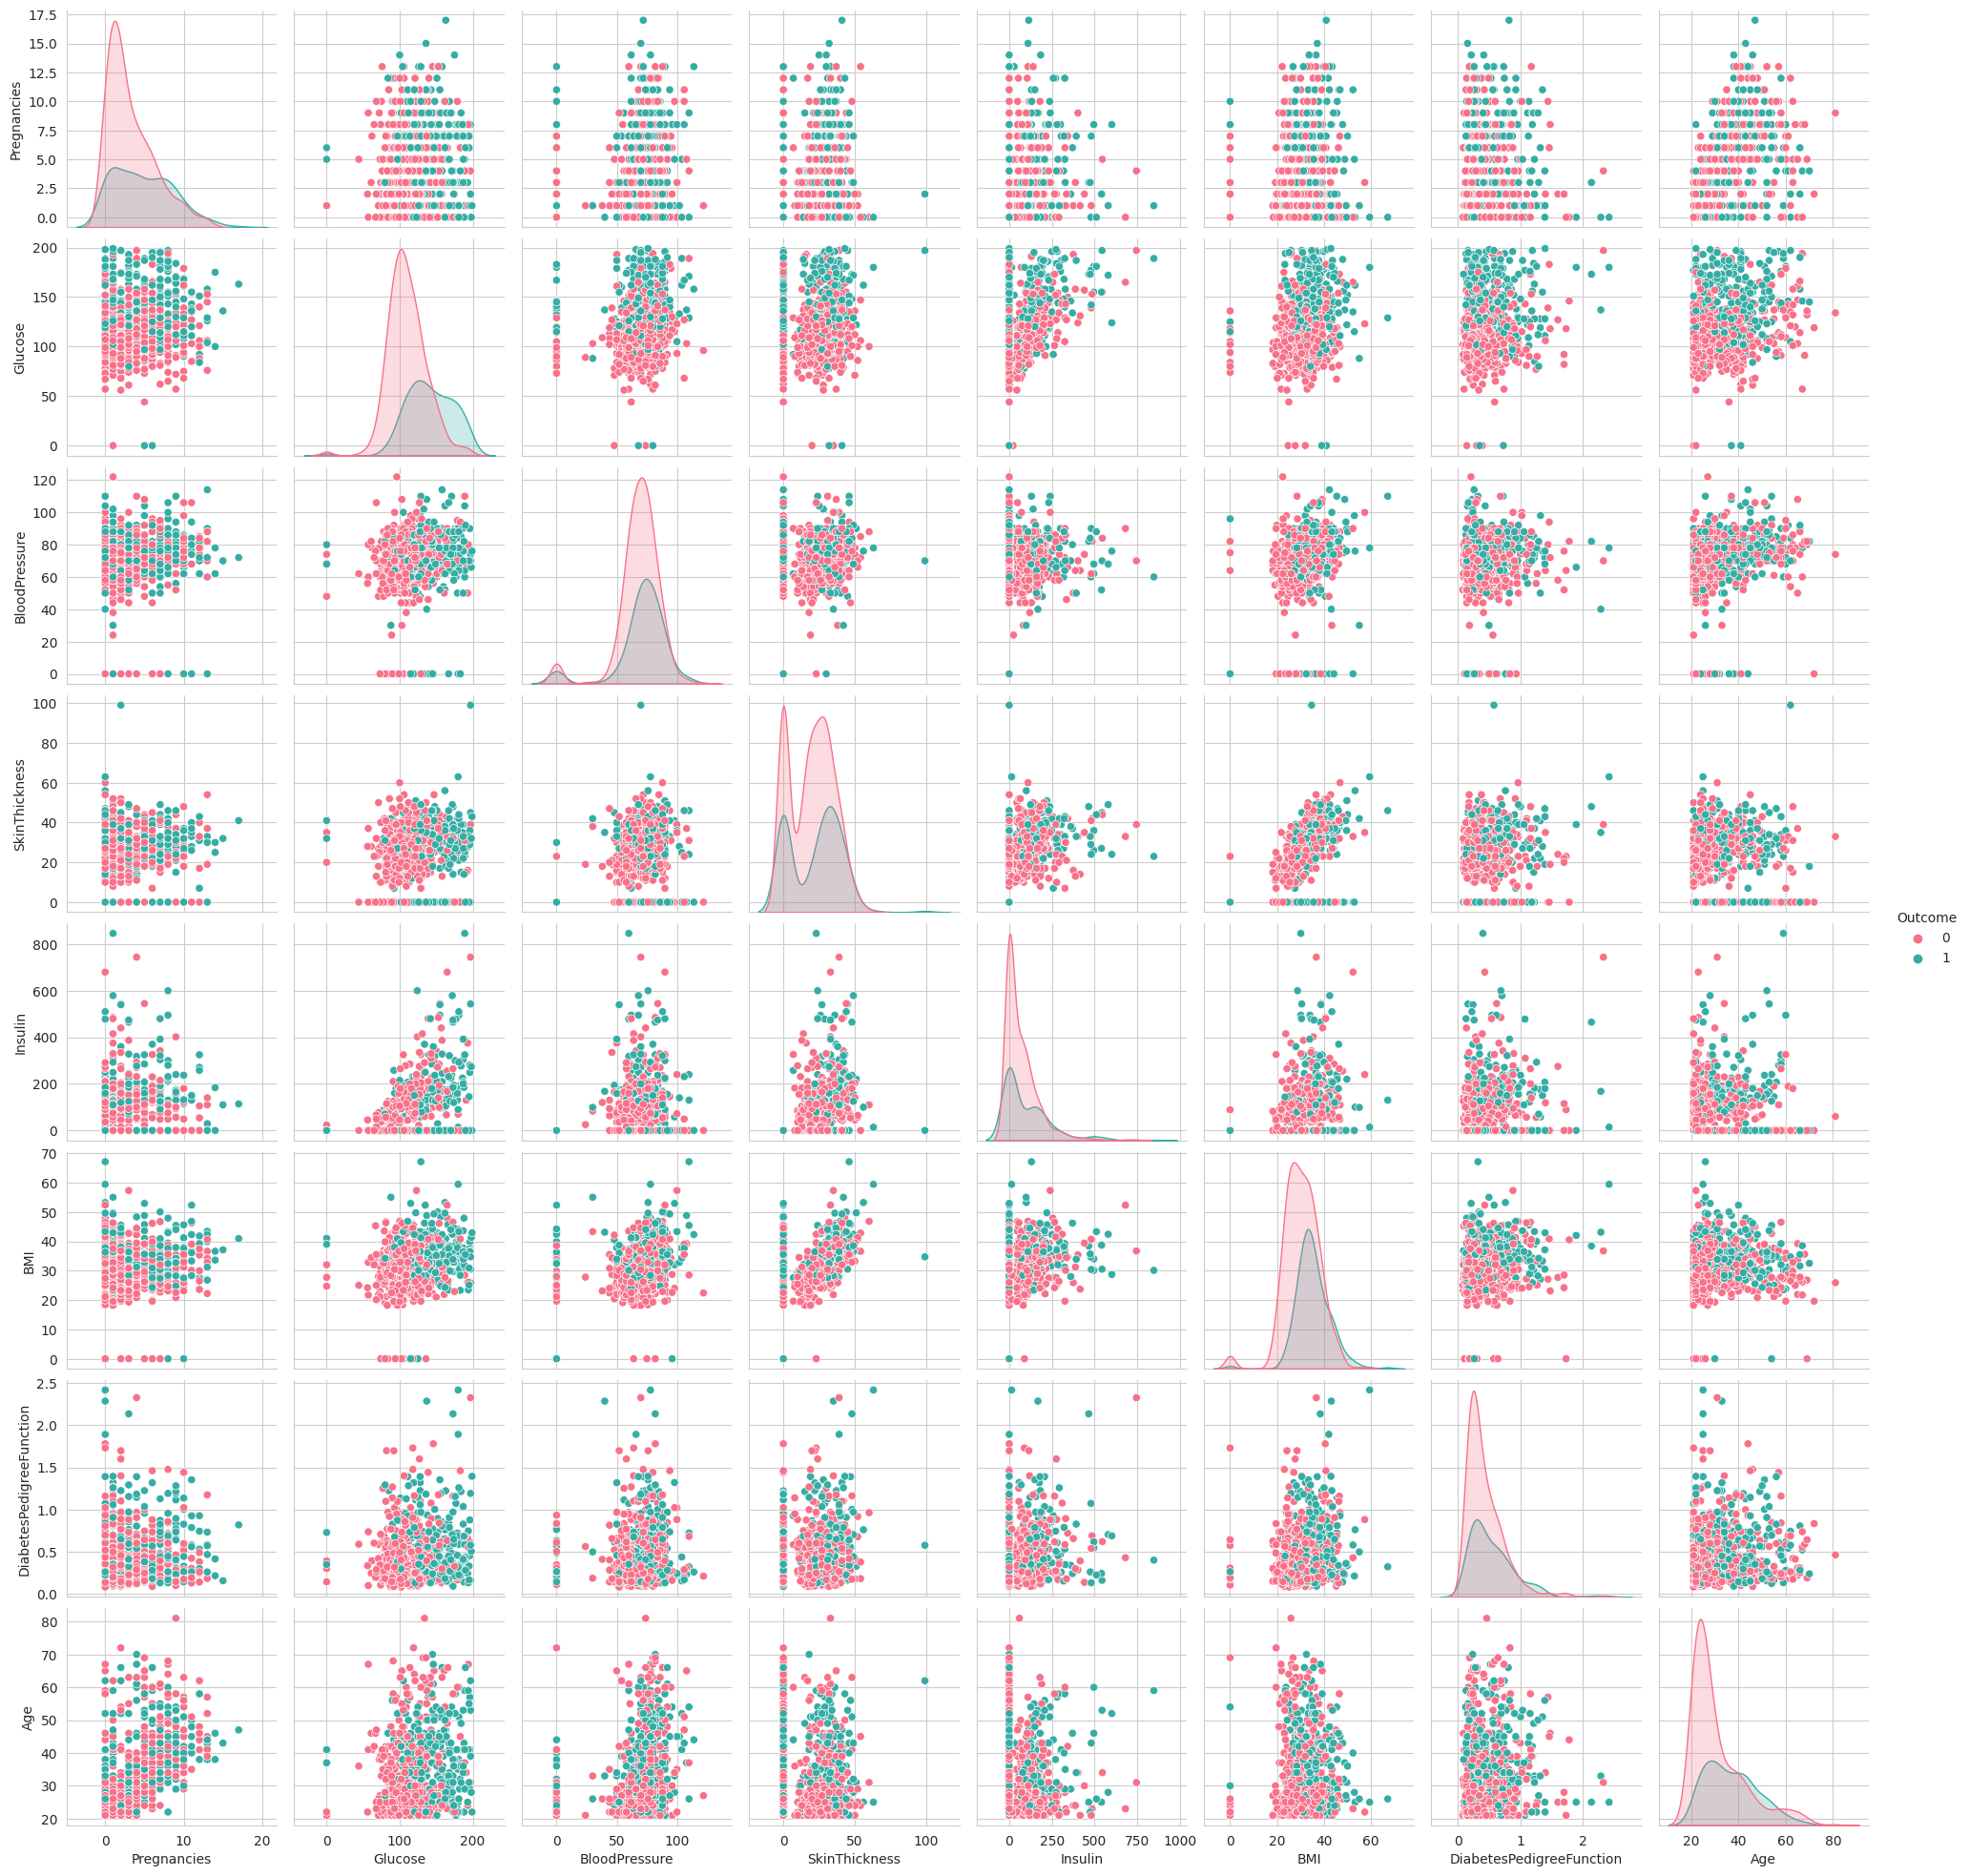

In [ ]:
sns.pairplot(diab_df, hue="Outcome",palette="husl")

**Model Building :**

In [ ]:
X = diab_df.loc[:, diab_df.columns != 'Outcome']
y = diab_df['Outcome']

In [ ]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [ ]:
print(y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


**Train Test Split**

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# Scale the data
scaler = StandardScaler()
X_Learning = scaler.fit_transform(X_train)
X_Analysis = scaler.transform(X_test)


Standardization of a dataset involves adjusting the distribution of values in such a way that the mean of observed values becomes 0 and the standard deviation becomes 1. This process can be achieved by either centering the data or subtracting the mean value. Scaling the features is crucial because different features have varying scales. For instance, the Age feature may have values in double digits, whereas DPF may have values in float format, and the effect of the Age feature on the model may be greater than that of the DPF feature.

It is recommended to only use the training set for determining how to scale/normalize the data and then apply the same transform to the test set without making any modifications. If you use the whole dataset to calculate the feature mean and variance, you're using information about the distribution of the test set to set the scale of the training set, which may lead to information leakage.

Therefore, the correct approach is to calculate the mean and variance using only the training set, normalize the training set accordingly, and then use the same (training) mean and variance to normalize the test set during test time.

**Feature Scaling :**

Feature scaling is a method used during data preprocessing to standardize the independent features in a fixed range. This is necessary to handle highly varying magnitudes or values or units. If feature scaling is not performed, a machine learning algorithm will tend to weigh greater values higher and consider smaller values as lower values, regardless of the unit of the values. The Standard Scaler is an effective technique that rescales a feature value so that it has a distribution with a mean of 0 and a variance of 1.

In [ ]:
print("Number of transactions X_Learning dataset: ", X_Learning.shape)
print("Number of transactions y_train dataset: ", y_train.shape)
print("Number pf transactions X_Analysis dataset: ", X_Analysis.shape)
print("Number of transactions y_test dataset: ", y_test.shape)

Number of transactions X_Learning dataset:  (576, 8)
Number of transactions y_train dataset:  (576,)
Number pf transactions X_Analysis dataset:  (192, 8)
Number of transactions y_test dataset:  (192,)


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,roc_curve,accuracy_score,auc

**SVM algorithm :**

Support Vector Machine (SVM) is a powerful machine learning algorithm used for classification and regression tasks. It works by finding the optimal hyperplane that separates different classes in a dataset. SVM can handle both linear and non-linear data by using kernel functions. SVM aims to maximize the margin between the support vectors and the decision boundary, making it more robust to outliers.

In [ ]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf')
svm.fit(X_Learning, y_train)
y_pred = svm.predict(X_Analysis)


In [ ]:
y_pred=svm.predict(X_Analysis)
accuracy_score(y_test,y_pred)

0.75

**Classification report :**

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       125
           1       0.67      0.57      0.61        67

    accuracy                           0.75       192
   macro avg       0.73      0.71      0.71       192
weighted avg       0.74      0.75      0.74       192



**ROC curve :**

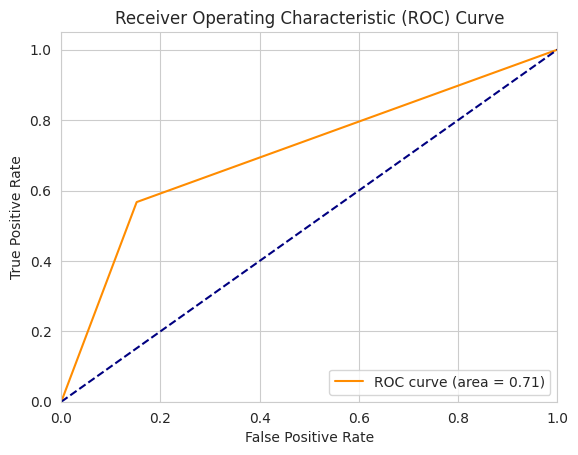

In [ ]:
from sklearn.metrics import roc_curve, auc

# calculate fpr and tpr
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [ ]:
train_score_svm = round(accuracy_score(y_train, svm.predict(X_Learning)) * 100, 2)
test_score_svm = round(accuracy_score(y_test, svm.predict(X_Analysis)) * 100, 2)

**Random forest classifier :**

A random forest model is a type of classifier that builds multiple decision trees by randomly selecting subsets of the training set. The model combines the results of the individual trees to determine the final class of a test object. This approach is effective because a single decision tree may be susceptible to noise, but the aggregation of many decision trees reduces the impact of noise, resulting in more precise outcomes.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

classifier=RandomForestClassifier(n_estimators = 10, random_state = 42)
classifier.fit(X_Learning,y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

In [ ]:
Y_pred = classifier.predict(X_Analysis)
accuracy = accuracy_score(y_test, Y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7395833333333334


In [ ]:
print(classification_report(y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.77      0.86      0.81       125
           1       0.66      0.52      0.58        67

    accuracy                           0.74       192
   macro avg       0.72      0.69      0.70       192
weighted avg       0.73      0.74      0.73       192



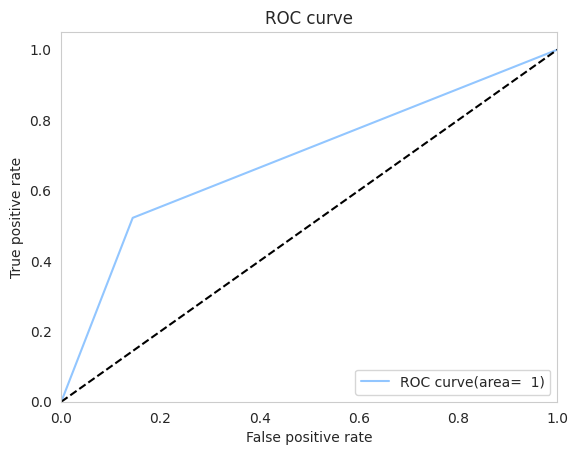

In [ ]:
fpr,tpr,_=roc_curve(y_test,Y_pred)
#calculate AUC
roc_auc=auc(fpr,tpr)
#print('ROC AUC: %0.2f' % roc_auc)
#plot of ROC curve for a specified class
plt.figure()
plt.plot(fpr,tpr,label='ROC curve(area= %2.f)' %roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [ ]:
train_score_rand = round(accuracy_score(y_train, rand.predict(X_Learning)) * 100, 2)
test_score_rand = round(accuracy_score(y_test, rand.predict(X_Analysis)) * 100, 2)

**Logistic Regression:**

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

# Fit the model on the training data
logreg.fit(X_Learning, y_train)

# Predict the labels of the test data
y_pred = logreg.predict(X_Analysis)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

print('Accuracy:', accuracy)


Accuracy: 0.734375


In [ ]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

In [ ]:
pred_logistic_test = clf.predict(X_Analysis)
pred_logistic_train = clf.predict(X_Learning)

In [ ]:
print("Training Accuracy: ", accuracy_score(y_train, pred_logistic_train))
print("Test Accuracy: ", accuracy_score(y_test, pred_logistic_test))

Training Accuracy:  0.6510416666666666
Test Accuracy:  0.6510416666666666


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
cr = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(cr)

Confusion Matrix:
[[105  20]
 [ 32  35]]

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.84      0.80       125
           1       0.64      0.52      0.57        67

    accuracy                           0.73       192
   macro avg       0.70      0.68      0.69       192
weighted avg       0.72      0.73      0.72       192



**KNN model :**

K-Nearest Neighbour (K-NN) is a basic Machine Learning algorithm that falls under the Supervised Learning technique. It can be used for solving both Regression and Classification problems, but it is commonly used for Classification problems.
The K-NN algorithm works by considering the similarity between the new data and the available data cases, and it categorizes the new data into the category that is most similar to the available categories.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors=3) 
KNN.fit(X_Learning,y_train)  
print(KNN.score(X_Analysis,y_test))

0.6927083333333334


In [ ]:
y_pred=KNN.predict(X_Analysis)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.80      0.77       125
           1       0.57      0.49      0.53        67

    accuracy                           0.69       192
   macro avg       0.66      0.65      0.65       192
weighted avg       0.68      0.69      0.69       192



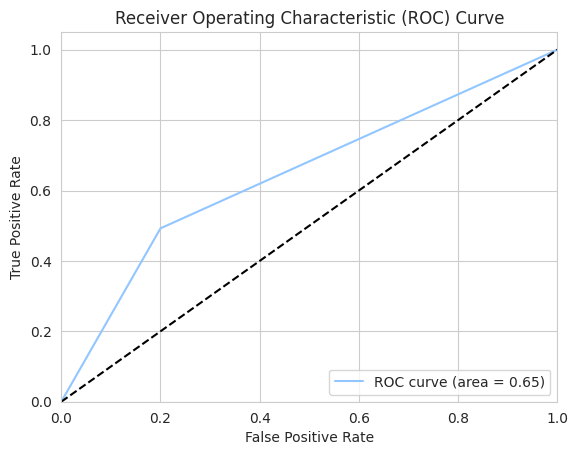

In [ ]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [ ]:
train_score_KNN = round(accuracy_score(y_train, KNN.predict(X_Learning)) * 100, 2)
test_score_KNN = round(accuracy_score(y_test, KNN.predict(X_Analysis)) * 100, 2)

**XG BOOST:**

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators = 500, learning_rate = 0.15)
xgb.fit(X_Learning, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.15, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
y_pred=xgb.predict(X_Analysis)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.83      0.82       125
           1       0.66      0.61      0.64        67

    accuracy                           0.76       192
   macro avg       0.73      0.72      0.73       192
weighted avg       0.75      0.76      0.75       192



In [ ]:
train_score_xgb = round(accuracy_score(y_train, xgb.predict(X_Learning)) * 100, 2)
test_score_xgb = round(accuracy_score(y_test, xgb.predict(X_Analysis)) * 100, 2)

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

# create and train the models
svm = SVC()
svm.fit(X_Learning, y_train)

rand = RandomForestClassifier(n_estimators=100)
rand.fit(X_Learning, y_train)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_Learning, y_train)

xgb = XGBClassifier()
xgb.fit(X_Learning, y_train)

# compute the training and testing accuracies for each model
train_score_svm = round(accuracy_score(y_train, svm.predict(X_Learning)) * 100, 2)
test_score_svm = round(accuracy_score(y_test, svm.predict(X_Analysis)) * 100, 2)

train_score_rand = round(accuracy_score(y_train, rand.predict(X_Learning)) * 100, 2)
test_score_rand = round(accuracy_score(y_test, rand.predict(X_Analysis)) * 100, 2)

train_score_KNN = round(accuracy_score(y_train, knn.predict(X_Learning)) * 100, 2)
test_score_KNN = round(accuracy_score(y_test, knn.predict(X_Analysis)) * 100, 2)

train_score_xgb = round(accuracy_score(y_train, xgb.predict(X_Learning)) * 100, 2)
test_score_xgb = round(accuracy_score(y_test, xgb.predict(X_Analysis)) * 100, 2)

# create a DataFrame to store the accuracies
models = {
    'Train Accuracy': [train_score_svm, train_score_rand, train_score_KNN, train_score_xgb],
    'Test Accuracy' : [test_score_svm, test_score_rand, test_score_KNN, test_score_xgb]
}

models_df = pd.DataFrame(models, index = ['Support Vector Machine', 'Random Forest Classifier', 'K-Nearest Neighbor', 'XGBoost'])
print(models_df)

                          Train Accuracy  Test Accuracy
Support Vector Machine             84.72          75.00
Random Forest Classifier          100.00          75.00
K-Nearest Neighbor                 81.25          70.83
XGBoost                           100.00          74.48


By analyzing the provided dataframe, it is evident that the XGBoost algorithms have all demonstrated overfitting on the dataset. To address this issue, we can further investigate the results by applying Cross Validation.

**CROSS Validation:**

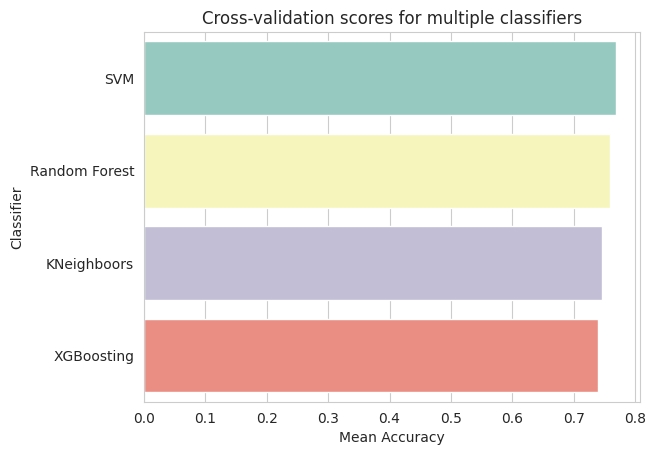

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the cross-validation settings
kfold = StratifiedKFold(n_splits=10)

# Define the classifiers with hyperparameters
svm = SVC(C=1.0, kernel='rbf', gamma='scale', random_state=0)
rf = RandomForestClassifier(n_estimators=500, random_state=0)
knn = KNeighborsClassifier()
xgb = XGBClassifier(random_state=0)

# Perform cross-validation and store the mean accuracy score for each classifier
classifiers = [("SVM", svm), ("Random Forest", rf), ("KNeighboors", knn), ("XGBoosting", xgb)]
clf_means = []
clf_names = []
for clf_name, clf in classifiers:
    clf_cv_scores = cross_val_score(clf, X_Learning, y_train, cv=kfold, scoring='accuracy')
    clf_means.append(clf_cv_scores.mean())
    clf_names.append(clf_name)

# Create a bar plot of the mean accuracy scores for each classifier
sns.barplot(x=clf_means, y=clf_names, palette="Set3")
plt.xlabel("Mean Accuracy")
plt.ylabel("Classifier")
plt.title("Cross-validation scores for multiple classifiers")
plt.show()


In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

# Define the cross-validation settings
kfold = StratifiedKFold(n_splits=10)

# Define the classifiers with hyperparameters
svm = SVC(C=1.0, kernel='rbf', gamma='scale', random_state=0)
rf = RandomForestClassifier(n_estimators=500, random_state=0)
knn = KNeighborsClassifier()
xgb = XGBClassifier(random_state=0)

# Perform cross-validation and print the mean accuracy score for each classifier
classifiers = [("SVM", svm), ("Random Forest", rf), ("KNeighboors", knn), ("XGBoosting", xgb)]
for clf_name, clf in classifiers:
    clf_cv_scores = cross_val_score(clf, X_Learning, y_train, cv=kfold, scoring='accuracy')
    print(f"{clf_name} Cross-validation scores:", clf_cv_scores)
    print(f"{clf_name} Mean Accuracy:", clf_cv_scores.mean())


SVM Cross-validation scores: [0.75862069 0.67241379 0.75862069 0.72413793 0.81034483 0.75862069
 0.85964912 0.77192982 0.8245614  0.75438596]
SVM Mean Accuracy: 0.7693284936479129
Random Forest Cross-validation scores: [0.79310345 0.62068966 0.81034483 0.74137931 0.75862069 0.75862069
 0.8245614  0.77192982 0.77192982 0.73684211]
Random Forest Mean Accuracy: 0.7588021778584392
KNeighboors Cross-validation scores: [0.74137931 0.67241379 0.72413793 0.67241379 0.79310345 0.77586207
 0.80701754 0.80701754 0.73684211 0.73684211]
KNeighboors Mean Accuracy: 0.74670296430732
XGBoosting Cross-validation scores: [0.74137931 0.62068966 0.77586207 0.70689655 0.75862069 0.75862069
 0.78947368 0.77192982 0.71929825 0.75438596]
XGBoosting Mean Accuracy: 0.7397156684815488


Looks like all the classifiers have more 90% accuracy, lets tune them.

In [ ]:
from sklearn.model_selection import GridSearchCV

RFC = RandomForestClassifier(random_state=0)

## Search grid for optimal parameters
rf_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}

gsRFC = GridSearchCV(RFC, param_grid=rf_param_grid, cv=kfold, scoring="accuracy", n_jobs=4, verbose=1)
gsRFC.fit(X_Learning, y_train)

RFC_best = gsRFC.best_estimator_

# Print the best parameters and mean cross-validation score
print("Best parameters: ", gsRFC.best_params_)
print("Mean cross-validation score: ", gsRFC.best_score_)


Fitting 10 folds for each of 54 candidates, totalling 540 fits
Best parameters:  {'bootstrap': False, 'criterion': 'gini', 'max_depth': None, 'max_features': 1, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 300}
Mean cross-validation score:  0.7726557773744707


In [ ]:
print(RFC_best)

RandomForestClassifier(bootstrap=False, max_features=1, min_samples_leaf=3,
                       min_samples_split=10, n_estimators=300, random_state=0)


In [ ]:
XGB = XGBClassifier(verbosity=0)
gb_param_grid = {'loss': ['deviance'],
                 'n_estimators': [100, 200, 300],
                 'learning_rate': [0.1, 0.05, 0.01],
                 'max_depth': [4, 8],
                 'min_samples_leaf': [100, 150],
                 'max_features': [0.3, 0.1]}

gsXGB = GridSearchCV(XGB, param_grid=gb_param_grid, cv=kfold, scoring='accuracy')
gsXGB.fit(X_Learning, y_train)

XGB_best = gsXGB.best_estimator_

# Print the best parameters and mean cross-validation score
print('Best parameters:', gsXGB.best_params_)
print('Mean cross-validation score:', gsXGB.best_score_)


Best parameters: {'learning_rate': 0.05, 'loss': 'deviance', 'max_depth': 4, 'max_features': 0.3, 'min_samples_leaf': 100, 'n_estimators': 100}
Mean cross-validation score: 0.7588929219600725


In [ ]:
XGB_best

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, loss='deviance',
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_features=0.3,
              max_leaves=None, min_child_weight=None, min_samples_leaf=100,
              missing=nan, monotone_constraints=None, n_estimators=100,
              n_jobs=None, ...)

Saving the trained model

In [ ]:
import pickle

In [ ]:
filename = 'diabetes.sav'
pickle.dump(logreg, open(filename, 'wb'))

In [ ]:
with open('diabetes.sav', 'rb') as file:
    loaded_model = pickle.load(file)

In [ ]:
for column in x.columns:
  print(column)

Pregnancies
Glucose
BloodPressure
SkinThickness
Insulin
BMI
DiabetesPedigreeFunction
Age
